In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [204]:
df = pd.read_csv('raw_data/precision-experiment-2022-11-09T14_30_34.775Z (2).csv')
df

,rt,response,trial_type,trial_index,time_elapsed,internal_node_id,load_time,success,jspsych_start_time,item_width_mm,item_height_mm,item_width_px,px2mm,view_dist_mm,item_width_deg,px2deg,win_width_deg,win_height_deg,stimulus,response_type,key_press,avg_frame_time,center_x,center_y,rastoc-type,stimulus-coordinate,calibration-id,calibration-point-id,inner-width,inner-height,webgazer_data,webgazer_targets,session-id,validation-id,tracked-trial-id,trial-tag,start-x,start-y,events
0,30224.0,"{""webcam-id"":""3"",""computer-id"":""3"",""web-browse...",survey-html-form,0,30228,0.0-0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,webgazer-init-camera,1,46985,0.0-1.0,1831.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,fullscreen,2,50819,0.0-2.0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,events-tracking-start,3,50820,0.0-3.0,NaN,NaN,2022-11-09T14:15:44.293Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,86535.0,NaN,virtual-chinrest,4,137356,0.0-4.0,NaN,NaN,NaN,85.6,53.98,344.0,4.02,586.22,8.351527,41.190073,46.613173,26.21991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,9361.0,0,html-button-response,5,146720,0.0-5.0-0.0-0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,\n <h3>Calibration Session</h3>\n\n ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,720.0,,psychophysics,6,148047,0.0-5.0-0.0-1.0-0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,key,,17.329961,960.0,536.0,calibration-stimulus,"{""x"":412,""y"":0}",0.0,0.0,1920.0,1080.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,845.0,,psychophysics,7,149458,0.0-5.0-0.0-1.1-0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,key,,17.083272,960.0,536.0,calibration-stimulus,"{""x"":0,""y"":-405}",0.0,1.0,1920.0,1080.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,729.0,,psychophysics,8,150742,0.0-5.0-0.0-1.2-0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,key,,17.122419,960.0,536.0,calibration-stimulus,"{""x"":412,""y"":-405}",0.0,2.0,1920.0,1080.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,845.0,,psychophysics,9,152156,0.0-5.0-0.0-1.3-0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,key,,17.078232,960.0,536.0,calibration-stimulus,"{""x"":0,""y"":0}",0.0,3.0,1920.0,1080.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [143]:
df.columns

Index(['rt', 'response', 'trial_type', 'trial_index', 'time_elapsed',
       'internal_node_id', 'load_time', 'success', 'jspsych_start_time',
       'item_width_mm', 'item_height_mm', 'item_width_px', 'px2mm',
       'view_dist_mm', 'item_width_deg', 'px2deg', 'win_width_deg',
       'win_height_deg', 'stimulus', 'response_type', 'key_press',
       'avg_frame_time', 'center_x', 'center_y', 'rastoc-type',
       'stimulus-coordinate', 'calibration-id', 'calibration-point-id',
       'inner-width', 'inner-height', 'webgazer_data', 'webgazer_targets',
       'session-id', 'validation-id', 'tracked-trial-id', 'trial-tag',
       'start-x', 'start-y', 'events'],
      dtype='object')

In [44]:
# Tenemos 
df['trial-tag'].value_counts(dropna=False)

validation-stimulus    576
NaN                    167
fixation-stimulus       64
Name: trial-tag, dtype: int64

In [64]:
df['stimulus-coordinate'].value_counts(dropna=False)

NaN                    663
{"x":412,"y":0}         16
{"x":0,"y":-405}        16
{"x":412,"y":-405}      16
{"x":0,"y":0}           16
{"x":-412,"y":-405}     16
{"x":0,"y":405}         16
{"x":-412,"y":0}        16
{"x":412,"y":405}       16
{"x":-412,"y":405}      16
Name: stimulus-coordinate, dtype: int64

In [76]:
df['stimulus'].value_counts()

\n        <h3>Calibration Session</h3>\n\n        Sit comfortably, from now on try to keep your head as still as\n        possible.\n        <br>\n        <br>\n        \n        Next you will see a <b>series of markers</b> in the screen.\n        <br>\n\n        As they appear <b>fix your gaze</b> on them.\n        <br>\n\n        Once they turn orange, press the <b>space bar</b>.\n        <br>\n                8
\n      <h3>Experimentation Session (1 / 8)</h3>\n      8 times you will see a series of stimulus in the same\n      positions in which you just calibrated.\n      Fix your gaze on them as they appear.\n      <br>\n\n      A central cross will appear in between each pair of series.\n      While this cross is present you can rest your gaze and blink.\n      <br>\n\n      Press the space bar to start.\n            1
\n      <h3>Experimentation Session (2 / 8)</h3>\n      8 times you will see a series of stimulus in the same\n      positions in which you just calibrated.\n      

In [ ]:
for i in df.columns:
    print('columna: ',i)
    print(' ')
    print(df[i].value_counts())
    print(' ')

In [78]:
df['stimulus-coordinate'].value_counts(dropna=False)

NaN                    663
{"x":412,"y":0}         16
{"x":0,"y":-405}        16
{"x":412,"y":-405}      16
{"x":0,"y":0}           16
{"x":-412,"y":-405}     16
{"x":0,"y":405}         16
{"x":-412,"y":0}        16
{"x":412,"y":405}       16
{"x":-412,"y":405}      16
Name: stimulus-coordinate, dtype: int64

<function matplotlib.pyplot.xlim(*args, **kwargs)>

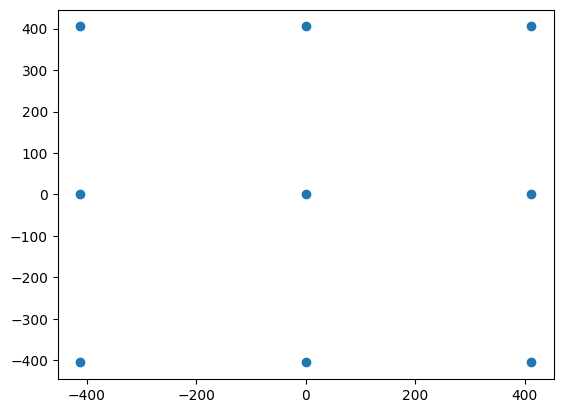

In [92]:
coords = df[~df['stimulus-coordinate'].isna()].iloc[:9]['stimulus-coordinate'].map(eval)
xs = []
ys = []
for i in coords:
    xs.append(i['x'])
    ys.append(i['y'])

plt.scatter(xs,ys)
plt.xlim

In [50]:
df[df['trial-tag'] == 'validation-stimulus']['webgazer_data']

26     [{"x":1189,"y":494,"t":0},{"x":1101,"y":478,"t...
27     [{"x":1148,"y":493,"t":0},{"x":1119,"y":451,"t...
28     [{"x":1248,"y":743,"t":0},{"x":1296,"y":731,"t...
29     [{"x":469,"y":191,"t":0},{"x":500,"y":178,"t":...
30     [{"x":1188,"y":322,"t":0},{"x":1164,"y":292,"t...
                             ...                        
800    [{"x":959,"y":899,"t":0},{"x":972,"y":779,"t":...
801    [{"x":1439,"y":466,"t":0},{"x":1347,"y":445,"t...
802    [{"x":499,"y":820,"t":0},{"x":504,"y":741,"t":...
803    [{"x":539,"y":139,"t":0},{"x":531,"y":141,"t":...
804    [{"x":1313,"y":694,"t":0},{"x":1326,"y":680,"t...
Name: webgazer_data, Length: 576, dtype: object

In [ ]:
df[~df['webgazer_data'].isna()]

In [ ]:
# for d in df[~df['webgazer_data'].isna()]['webgazer_data'].map(eval):
TAG = 'fixation-stimulus' # Es el momento donde aparece la cruz de fijacion

k = 0
plt.vlines(960,0,1080,'k')
plt.hlines(540,0,1920,'k')
for d in df[df['trial-tag'] == TAG]['webgazer_data'].map(eval):
    n = sum(df['trial-tag'] == TAG)
    xs = []
    ys = []
    ts = []
    for i in d:
        xs.append(i['x'])
        ys.append(i['y'])
        ts.append(i['t'])
    
    plt.scatter(xs,ys,c=(k/n)*np.reshape(np.repeat(np.ones(len(xs)),3),(len(xs),3)))
    k+=1

plt.xlim(0, 1920)
plt.ylim(0, 1080)
plt.show()


Validation point (1): 960, 536
Time between samples (ms) = 45 +- 10 
Sampling rate (Hz) = 23 +- 6 
Last time sample = 588
Horizontal error (pxs) = 180 +- 39 
Vertical error (pxs) = 63 +- 23 
Total error (pxs) = 192 +- 40 


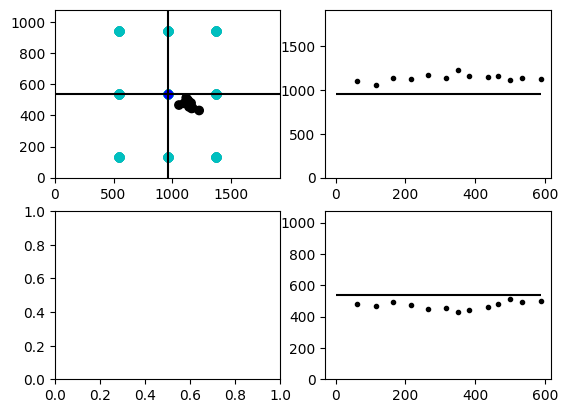

Validation point (1): 1372, 941
Time between samples (ms) = 52 +- 6 
Sampling rate (Hz) = 20 +- 3 
Last time sample = 618
Horizontal error (pxs) = 137 +- 57 
Vertical error (pxs) = 378 +- 112 
Total error (pxs) = 403 +- 123 


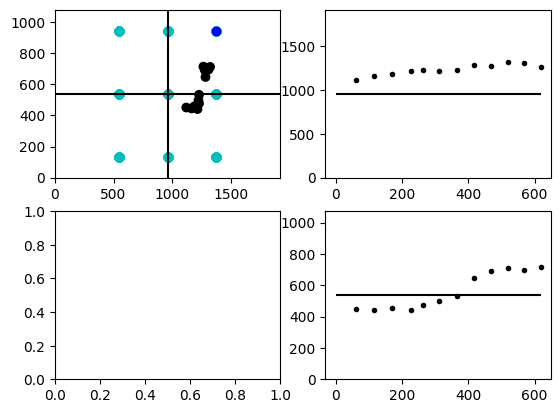

Validation point (1): 548, 131
Time between samples (ms) = 49 +- 9 
Sampling rate (Hz) = 22 +- 5 
Last time sample = 584
Horizontal error (pxs) = 424 +- 289 
Vertical error (pxs) = 419 +- 309 
Total error (pxs) = 606 +- 410 


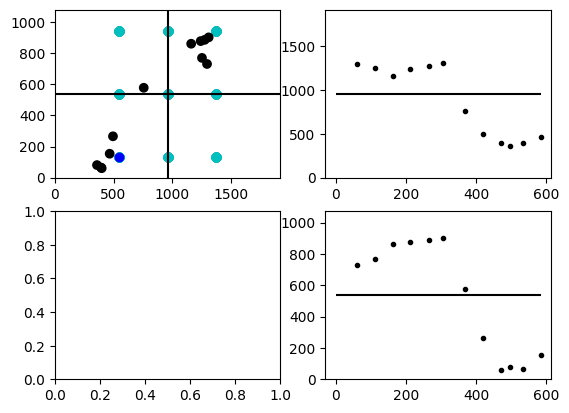

Validation point (1): 1372, 536
Time between samples (ms) = 45 +- 10 
Sampling rate (Hz) = 23 +- 6 
Last time sample = 589
Horizontal error (pxs) = 427 +- 367 
Vertical error (pxs) = 286 +- 76 
Total error (pxs) = 547 +- 325 


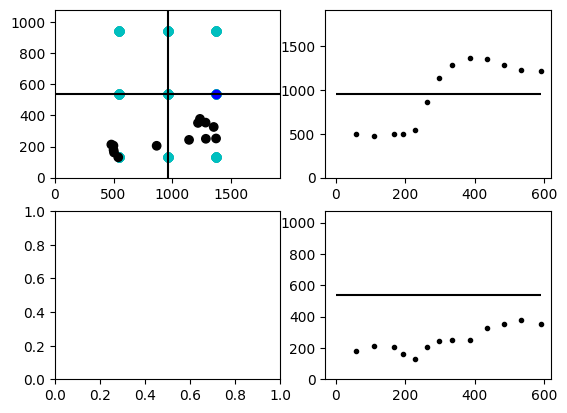

Validation point (1): 960, 941
Time between samples (ms) = 48 +- 8 
Sampling rate (Hz) = 22 +- 5 
Last time sample = 622
Horizontal error (pxs) = 121 +- 86 
Vertical error (pxs) = 405 +- 180 
Total error (pxs) = 424 +- 196 


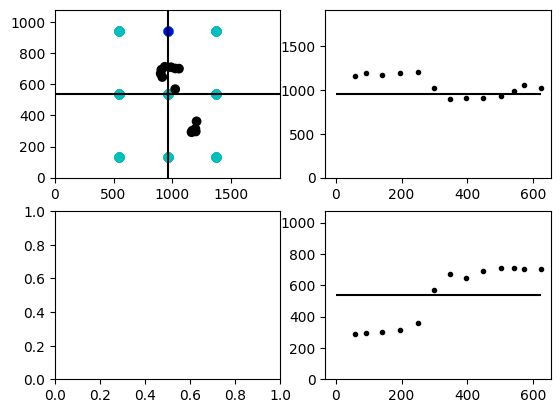

Validation point (1): 548, 536
Time between samples (ms) = 50 +- 12 
Sampling rate (Hz) = 21 +- 6 
Last time sample = 602
Horizontal error (pxs) = 200 +- 153 
Vertical error (pxs) = 225 +- 66 
Total error (pxs) = 326 +- 112 


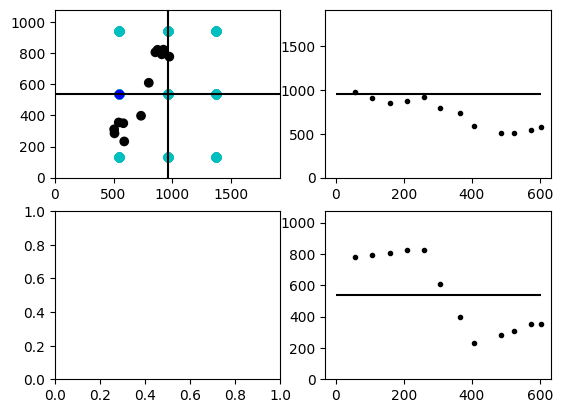

Validation point (1): 548, 941
Time between samples (ms) = 54 +- 12 
Sampling rate (Hz) = 19 +- 4 
Last time sample = 591
Horizontal error (pxs) = 164 +- 163 
Vertical error (pxs) = 391 +- 165 
Total error (pxs) = 449 +- 178 


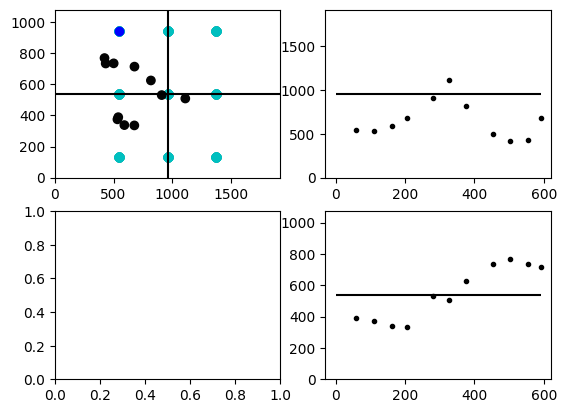

Validation point (1): 960, 131
Time between samples (ms) = 48 +- 12 
Sampling rate (Hz) = 22 +- 6 
Last time sample = 581
Horizontal error (pxs) = 361 +- 140 
Vertical error (pxs) = 394 +- 255 
Total error (pxs) = 559 +- 240 


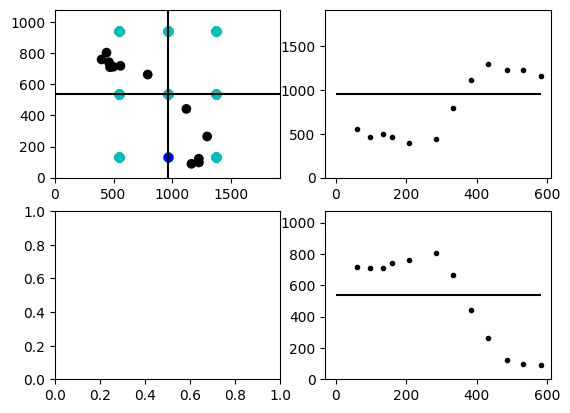

Validation point (1): 1372, 131
Time between samples (ms) = 55 +- 10 
Sampling rate (Hz) = 19 +- 3 
Last time sample = 609
Horizontal error (pxs) = 160 +- 101 
Vertical error (pxs) = 21 +- 17 
Total error (pxs) = 168 +- 91 


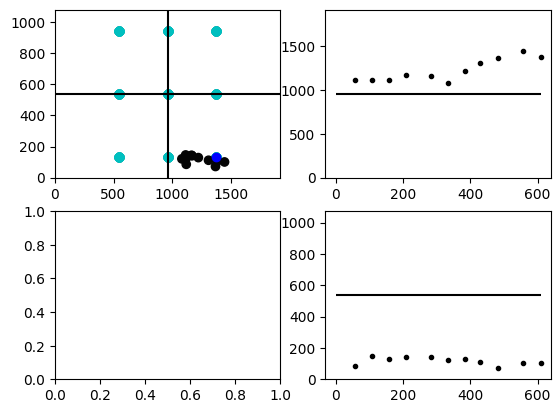

Validation point (2): 548, 536
Time between samples (ms) = 48 +- 12 
Sampling rate (Hz) = 22 +- 6 
Last time sample = 623
Horizontal error (pxs) = 432 +- 242 
Vertical error (pxs) = 86 +- 75 
Total error (pxs) = 453 +- 231 


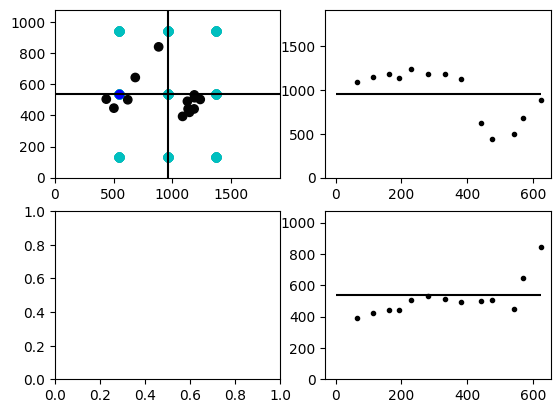

Validation point (2): 960, 941
Time between samples (ms) = 47 +- 7 
Sampling rate (Hz) = 22 +- 4 
Last time sample = 613
Horizontal error (pxs) = 208 +- 116 
Vertical error (pxs) = 208 +- 176 
Total error (pxs) = 313 +- 182 


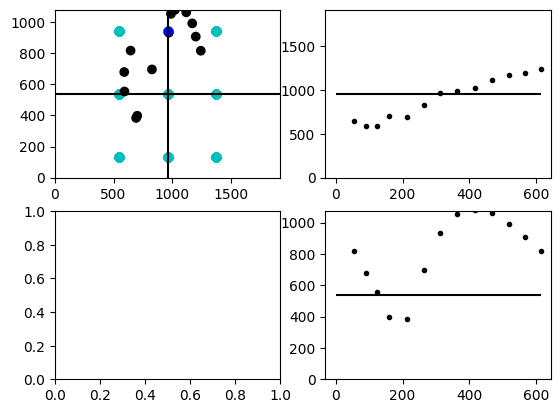

Validation point (2): 960, 131
Time between samples (ms) = 47 +- 9 
Sampling rate (Hz) = 22 +- 5 
Last time sample = 605
Horizontal error (pxs) = 114 +- 56 
Vertical error (pxs) = 424 +- 290 
Total error (pxs) = 460 +- 262 


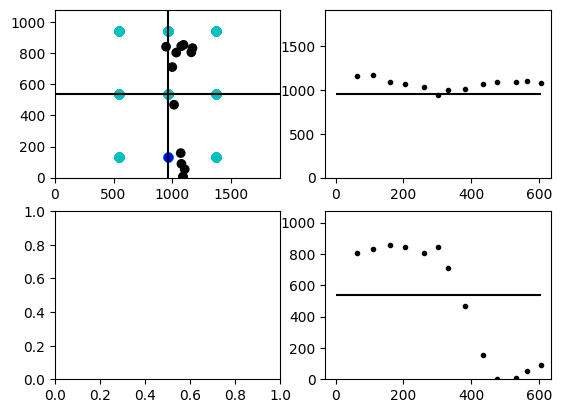

Validation point (2): 1372, 131
Time between samples (ms) = 48 +- 13 
Sampling rate (Hz) = 23 +- 7 
Last time sample = 622
Horizontal error (pxs) = 154 +- 104 
Vertical error (pxs) = 53 +- 15 
Total error (pxs) = 168 +- 96 


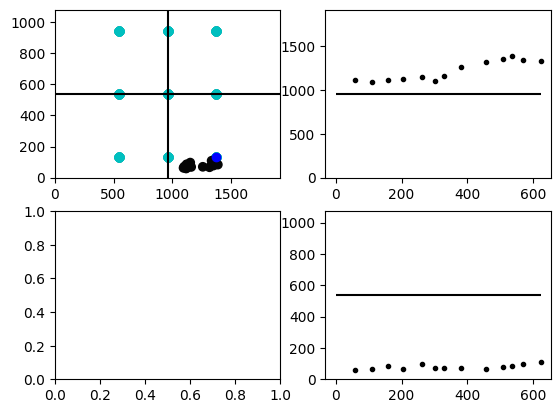

Validation point (2): 1372, 941
Time between samples (ms) = 45 +- 12 
Sampling rate (Hz) = 24 +- 6 
Last time sample = 585
Horizontal error (pxs) = 43 +- 29 
Vertical error (pxs) = 646 +- 190 
Total error (pxs) = 648 +- 191 


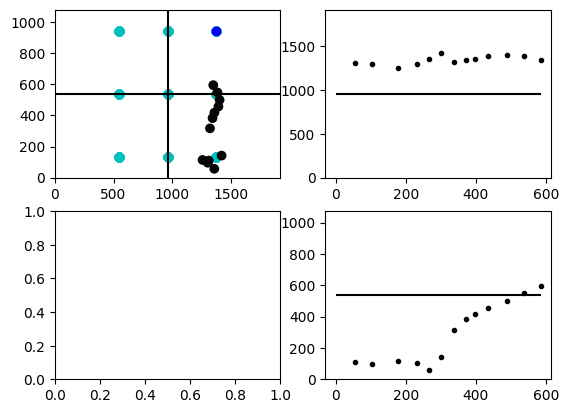

Validation point (2): 1372, 536
Time between samples (ms) = 46 +- 10 
Sampling rate (Hz) = 23 +- 5 
Last time sample = 604
Horizontal error (pxs) = 116 +- 66 
Vertical error (pxs) = 144 +- 45 
Total error (pxs) = 191 +- 63 


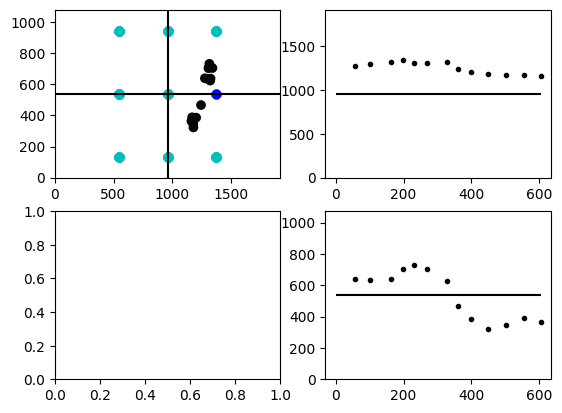

In [205]:
# for d in df[~df['webgazer_data'].isna()]['webgazer_data'].map(eval):
TAG = 'validation-stimulus' # Es el momento donde aparece la cruz de fijacion

center_x = df[df['trial-tag'] == TAG]['center_x'].iloc[0]
center_y = df[df['trial-tag'] == TAG]['center_y'].iloc[0]

n = sum(df['trial-tag'] == TAG)

nv = df[df['trial-tag'] == TAG]['validation-id'].values
xv = df[df['trial-tag'] == TAG]['start-x'].values + center_x
yv = df[df['trial-tag'] == TAG]['start-y'].values + center_y

# plt.scatter(xv,yv)
# plt.show()

# print(n)
# print(len(xv))

first_sample = 0
k = 0
for d in df[df['trial-tag'] == TAG]['webgazer_data'].map(eval):
    xs = []
    ys = []
    ts = []
    for i in d:
        xs.append(i['x'])
        ys.append(i['y'])
        ts.append(i['t'])

    print('Validation point (%d): %d, %d' % (nv[k],xv[k],yv[k]))

    print('Time between samples (ms) = %.0f +- %.0f ' % (np.mean(np.diff(ts)),np.std(np.diff(ts))))
    print('Sampling rate (Hz) = %.0f +- %.0f ' % (np.mean(1000/np.diff(ts)),np.std(1000/np.diff(ts))))
    print('Last time sample = %d' % max(ts))

    xs = np.array(xs)
    ys = np.array(ys)
    # ys = 2*center_y - np.array(ys)
    ts = np.array(ts)

    xs = xs[ts>first_sample]
    ys = ys[ts>first_sample]
    ts = ts[ts>first_sample]

    ex = abs(xs - xv[k])
    ey = abs(ys - yv[k])
    ee = np.sqrt(ex**2 + ey**2)

    print('Horizontal error (pxs) = %.0f +- %.0f ' % (np.mean(ex),np.std(ex)))
    print('Vertical error (pxs) = %.0f +- %.0f ' % (np.mean(ey),np.std(ey)))
    print('Total error (pxs) = %.0f +- %.0f ' % (np.mean(ee),np.std(ee)))

    fig,ax = plt.subplots(2,2)
    ax[0,0].scatter(xv,yv,c='c')
    ax[0,0].vlines(960,0,1080,'k')
    ax[0,0].hlines(540,0,1920,'k')
    ax[0,0].scatter(xs,ys,c=(k/n)*np.reshape(np.repeat(np.ones(len(xs)),3),(len(xs),3)))

    ax[0,0].scatter(xv[k],yv[k],c='b')

    ax[0,0].set_xlim(0, 1920)
    ax[0,0].set_ylim(0, 1080)

    ax[0,1].plot(ts,xs,'k.')
    ax[0,1].set_ylim(0, center_x*2)
    ax[0,1].hlines(center_x,0,max(ts),'k')

    ax[1,1].plot(ts,ys,'k.')
    ax[1,1].set_ylim(0, center_y*2)
    ax[1,1].hlines(center_y,0,max(ts),'k')

    plt.show()

    k+=1
    if (k==15):
        break


In [52]:
def graficar_un_sujeto(df, SUJ_NUM, TRIAL_NUM, RADIUS=18, CANVAS_SIZE=750):
        # Style
        COLORMAP_traj = "inferno"
        plt.style.use("seaborn")
        plt.rcParams["image.cmap"] = COLORMAP_traj
        # plt.rcParams['font.size'] = 1
        sns.set(font_scale=1.5)

        # Tamanio del grafico
        _, axs = plt.subplots(figsize=(12, 12))

        # #Settings para ploteo de items

        # Position fo the items presented on screen

        circle_coords = eval(df["all_xy_data"][SUJ_NUM])[TRIAL_NUM]  # Posicion de items
        stim_content = eval(df["all_content_data"][SUJ_NUM])[
            TRIAL_NUM
        ]  # Contenido de los items
        # diccionario_items = dict(zip(circle_coords,stim_content))
        CIRCLE_RADIUS = RADIUS
        FONT_SIZE = 14

        g2 = plt.scatter(
            x=eval(df["x_y_first_click"][SUJ_NUM])[TRIAL_NUM][0],
            y=eval(df["x_y_first_click"][SUJ_NUM])[TRIAL_NUM][1],
            color="g",
            edgecolors="yellow",
            marker="o",
            s=100,
            zorder=1000,
        )

        for stim_iterator, i in enumerate(circle_coords):

            a_circle = plt.Circle(i, CIRCLE_RADIUS, zorder=190)

            axs.add_artist(a_circle)

            axs.add_patch(a_circle)

            label = axs.annotate(
                stim_content[stim_iterator],
                xy=i,
                fontsize=FONT_SIZE,
                horizontalalignment="center",
                verticalalignment="center",
                color="white",
                zorder=200,
            )

        # Grafico la trayectoria
        g = sns.scatterplot(
            x=eval(df["x"][SUJ_NUM])[TRIAL_NUM],
            y=eval(df["y"][SUJ_NUM])[TRIAL_NUM],
            c=eval(df["t"][SUJ_NUM])[TRIAL_NUM],
            cmap=COLORMAP_traj,
            zorder=10,
        )  # z-order sirve para seleccionar la capa donde se plote (por delante o por detras de las otras cosas)

        # Aca invierto los ejes porque en mi experimento el (0,0) es la esquina superior izquierda
        g = plt.gca()  # get the axis
        g.set_ylim(g.get_ylim()[::-1])  # invert the axis
        g.xaxis.tick_top()  # and move the X-Axis

        # Set axis
        g.set_xlim(0, CANVAS_SIZE)  # set the ylim to left, right
        g.set_ylim(CANVAS_SIZE, 0)  # set the xlim to left, right

        # Grafico los puntos que tocan los circulos
        g3 = plt.scatter(
            x=eval(df["within_circle_x"][SUJ_NUM])[TRIAL_NUM],
            y=eval(df["within_circle_y"][SUJ_NUM])[TRIAL_NUM],
            color="red",
            edgecolors="red",
            marker="o",
            s=20,
            zorder=500,
        )

        # Labels
        g.set(
            xlabel="x coordinate",
            ylabel="y coordinate",
            title=f"Trayectoria del mouse en la pantalla para el sujetx {SUJ_NUM} trial {TRIAL_NUM} \n",
        )

        plt.colorbar(label="Time", orientation="horizontal", pad=0.001)

        plt.show

In [ ]:
# Style
COLORMAP_traj = "inferno"
plt.style.use("seaborn")
plt.rcParams["image.cmap"] = COLORMAP_traj
sns.set(font_scale=1.5)

# Tamanio del grafico
_, axs = plt.subplots(figsize=(12, 12))


# plots 

CIRCLE_RADIUS = 10
circle_coords = []

for stim_iterator, i in enumerate(circle_coords):

    a_circle = plt.Circle(i, CIRCLE_RADIUS, zorder=190)
    axs.add_artist(a_circle)
    axs.add_patch(a_circle)